**Group Members - Group 3**

1. Loritah Bukirwa
2. Gideon Ntwasi
3. Fiona Mbabazi
4. Comfort Agaba


**Assignment.**

You have been provided with the Dataset "Social_Media_Usage" which classifies the social media platforms used by males and females of different ages Social_Media_Usage.csvDownload Social_Media_Usage.csv


Generate a machine learning model to predict platforms used by a 21yr old female and a 32yr old male

In [149]:

import warnings 
warnings.filterwarnings('ignore')

#import the necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as mlt 
import seaborn as sns 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

#import the data set
social = pd.read_csv('Social_Media_Usage.csv')
social.head()

,age,gender,platform
0,20,female,tiktok
1,23,female,tiktok
2,25,female,tiktok
3,26,female,snapchat
4,29,female,snapchat


In [150]:
social.describe()

,age
count,18.000000
mean,28.055556
std,5.307843
min,20.000000
25%,25.000000
50%,28.000000
75%,31.000000
max,37.000000


Converting categorical data to continuous 

In [151]:
#checking unique values in the platform 
social["platform"].unique()

array(['tiktok', 'snapchat', 'twitter', 'facebook'], dtype=object)

In [152]:
social["gender"].replace(["female","male"],[0,1], inplace=True)

In [153]:
#generating the predictor input
X = social.drop(columns=["platform"]) #Independent Variables
X

,age,gender
0,20,0
1,23,0
2,25,0
3,26,0
4,29,0
5,30,0
6,31,0
7,33,0
8,37,0
9,20,1


In [154]:
#generate target output
y = social['platform'] #dependent variable
y

0       tiktok
1       tiktok
2       tiktok
3     snapchat
4     snapchat
5     snapchat
6      twitter
7      twitter
8      twitter
9       tiktok
10      tiktok
11      tiktok
12     twitter
13     twitter
14     twitter
15    facebook
16    facebook
17    facebook
Name: platform, dtype: object

In [155]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#creating the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [156]:
predictions = model.predict(X_test)
predictions

print(predictions)

['facebook' 'twitter' 'tiktok' 'facebook']


In [157]:
#test for accuracy to evaluate the model

print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 1.0


In [158]:
female_21_predictions = model.predict([[21, 0]])
male_32_predictions = model.predict([[32, 1]])

# Display the predictions
print("21yr old female will likely use:", female_21_predictions)
print("32yr old male will likely use:", male_32_predictions)


21yr old female will likely use: ['tiktok']
32yr old male will likely use: ['facebook']


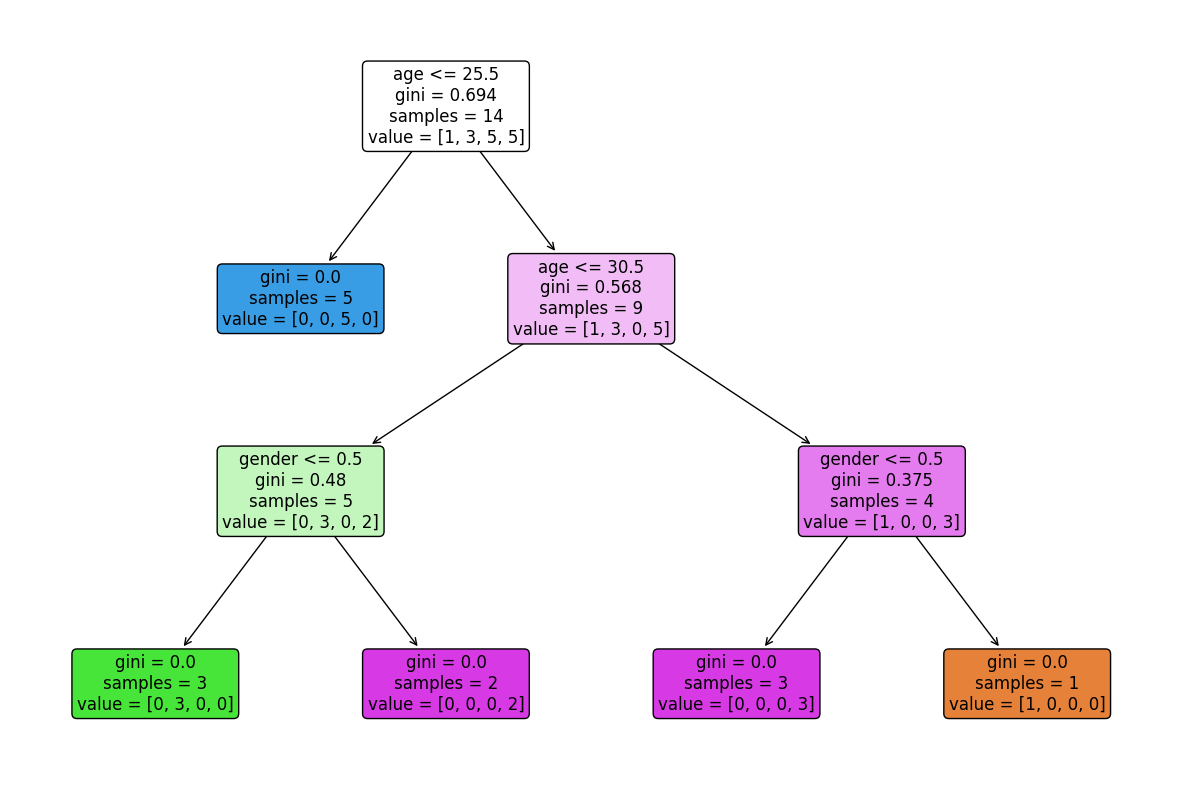

In [163]:
from sklearn.tree import plot_tree

#Decision Tree Mapping
mlt.figure(figsize=(15,10))
plot_tree(model, filled = True, feature_names = social.columns.tolist(), rounded = True, fontsize = 12)
mlt.show(block =  True)